In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
real_df = pd.read_csv("Data/Real_Datasets/wine_processed.csv")
CTABGANPlus_df = pd.read_csv('Data/Synthetic_Datasets/CTABGANPlus/Wine_fake_1.csv')

In [39]:
print('CTABGANPlus Dataset')
display(CTABGANPlus_df.head())

CTABGANPlus Dataset


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.645003         -0.595888    -0.609389        0.862206  -0.530613   
1      -0.813017         -0.447776    -0.064711       -0.271170  -0.827684   
2      -1.307201         -0.573414     0.136659       -0.451048  -0.828162   
3      -1.001430          0.185492    -0.565087       -1.035490   2.694673   
4       2.368746         -0.709882     1.002781        0.802826   0.098936   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.200612              0.535860 -0.554737 -0.157848   0.126624   
1             0.539668              0.349038 -0.690083  0.887067   0.350497   
2             0.068079              0.321843 -1.289936  1.119783   0.717108   
3            -0.502867             -0.059930 -0.588344  1.247328  -0.485665   
4            -0.260807              0.124294  0.407188 -1.471652   2.362527   

    alcohol  quality  type  
0  0.687327        1     1  
1  0.131130        0     1  
2  1.957956        0     1  
3 -0.057621        2     1  
4 -0.386471        1     1

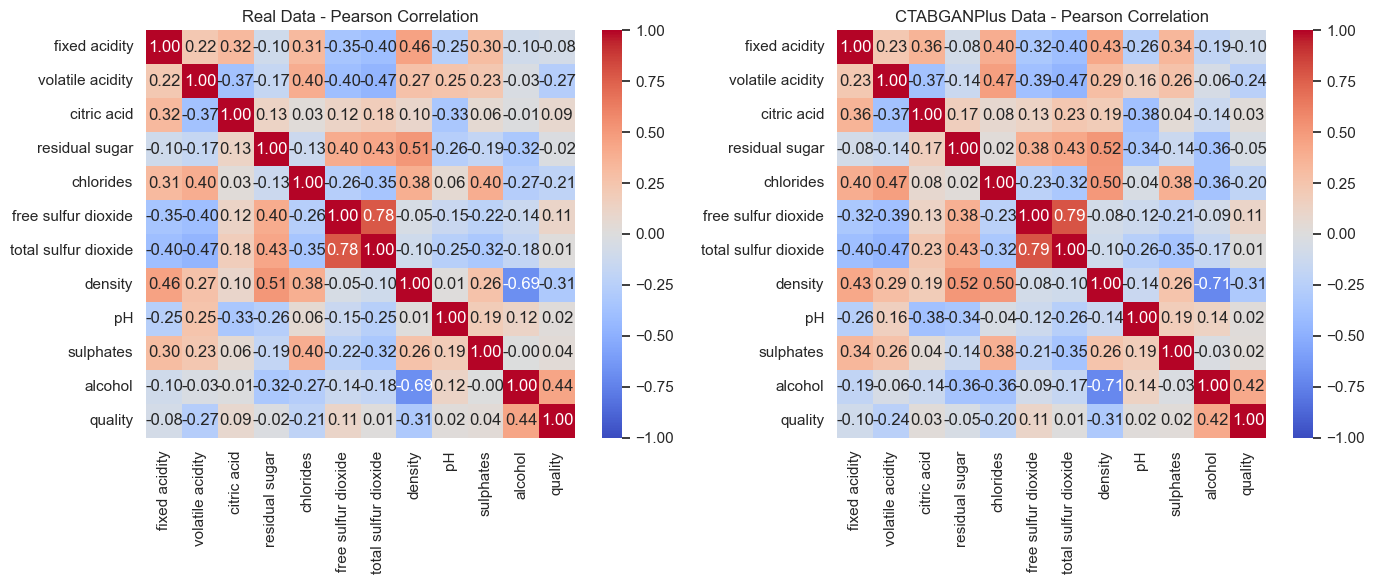

In [40]:
real_num = real_df.select_dtypes(include='number')
CTABGANPlus_num = CTABGANPlus_df.select_dtypes(include='number').drop(columns=['type'], errors='ignore')

real_pearson = real_num.corr(method='pearson')
CTABGANPlus_pearson = CTABGANPlus_num.corr(method='pearson')

plt.figure(figsize=(14, 6))

# Original data
plt.subplot(1, 2, 1)
sns.heatmap(real_pearson, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Real Data - Pearson Correlation')

# Synthesized data
plt.subplot(1, 2, 2)
sns.heatmap(CTABGANPlus_pearson, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('CTABGANPlus Data - Pearson Correlation')

plt.tight_layout()
plt.show()

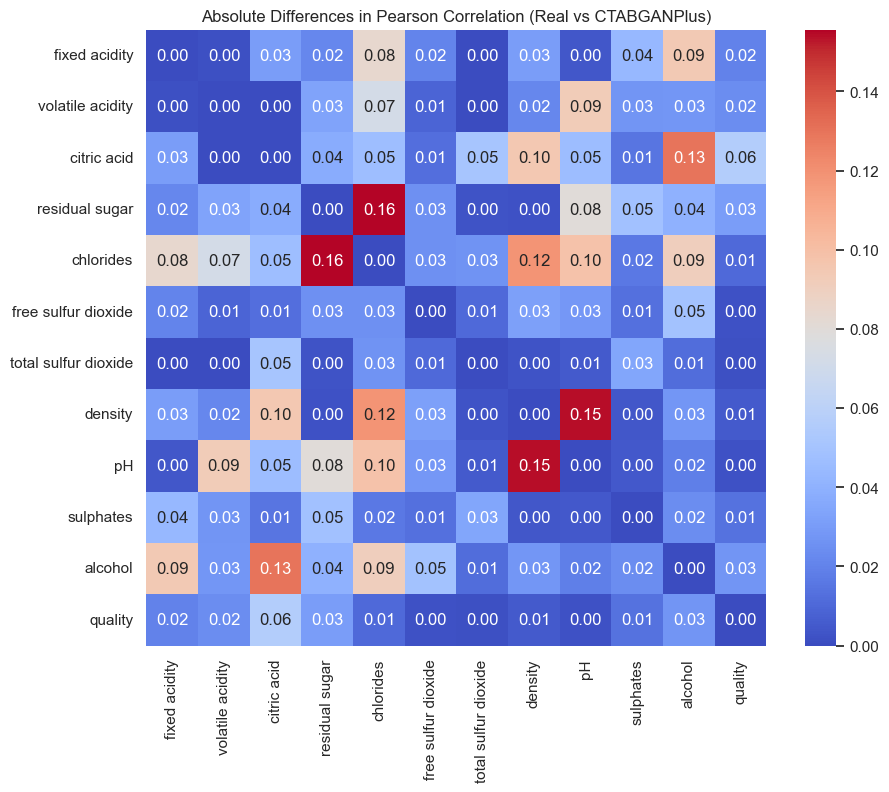

In [41]:
diff_CTABGANPlus = (real_pearson - CTABGANPlus_pearson).abs()
plt.figure(figsize=(10, 8))
sns.heatmap(diff_CTABGANPlus, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Absolute Differences in Pearson Correlation (Real vs CTABGANPlus)")
plt.show()

In [42]:
# Compute absolute differences (you already have diff_df)
abs_diff = diff_CTABGANPlus.abs()

# Mean absolute difference (off-diagonal)
vals = abs_diff.values[np.triu_indices_from(abs_diff, k=1)]
print("Mean absolute Pearson diff:", round(vals.mean(), 3))

# Find top 3 biggest drifts
pairs = []
for i, j in zip(*np.triu_indices_from(abs_diff, k=1)):
    pairs.append((abs_diff.iloc[i, j], diff_CTABGANPlus.columns[i], diff_CTABGANPlus.columns[j]))
top3 = sorted(pairs, reverse=True)[:3]
print("Top 3 biggest correlation shifts:")
for diff, f1, f2 in top3:
    print(f"  {f1!r} vs {f2!r}: Δ = {diff:.2f}")


Mean absolute Pearson diff: 0.036
Top 3 biggest correlation shifts:
  'residual sugar' vs 'chlorides': Δ = 0.16
  'density' vs 'pH': Δ = 0.15
  'citric acid' vs 'alcohol': Δ = 0.13


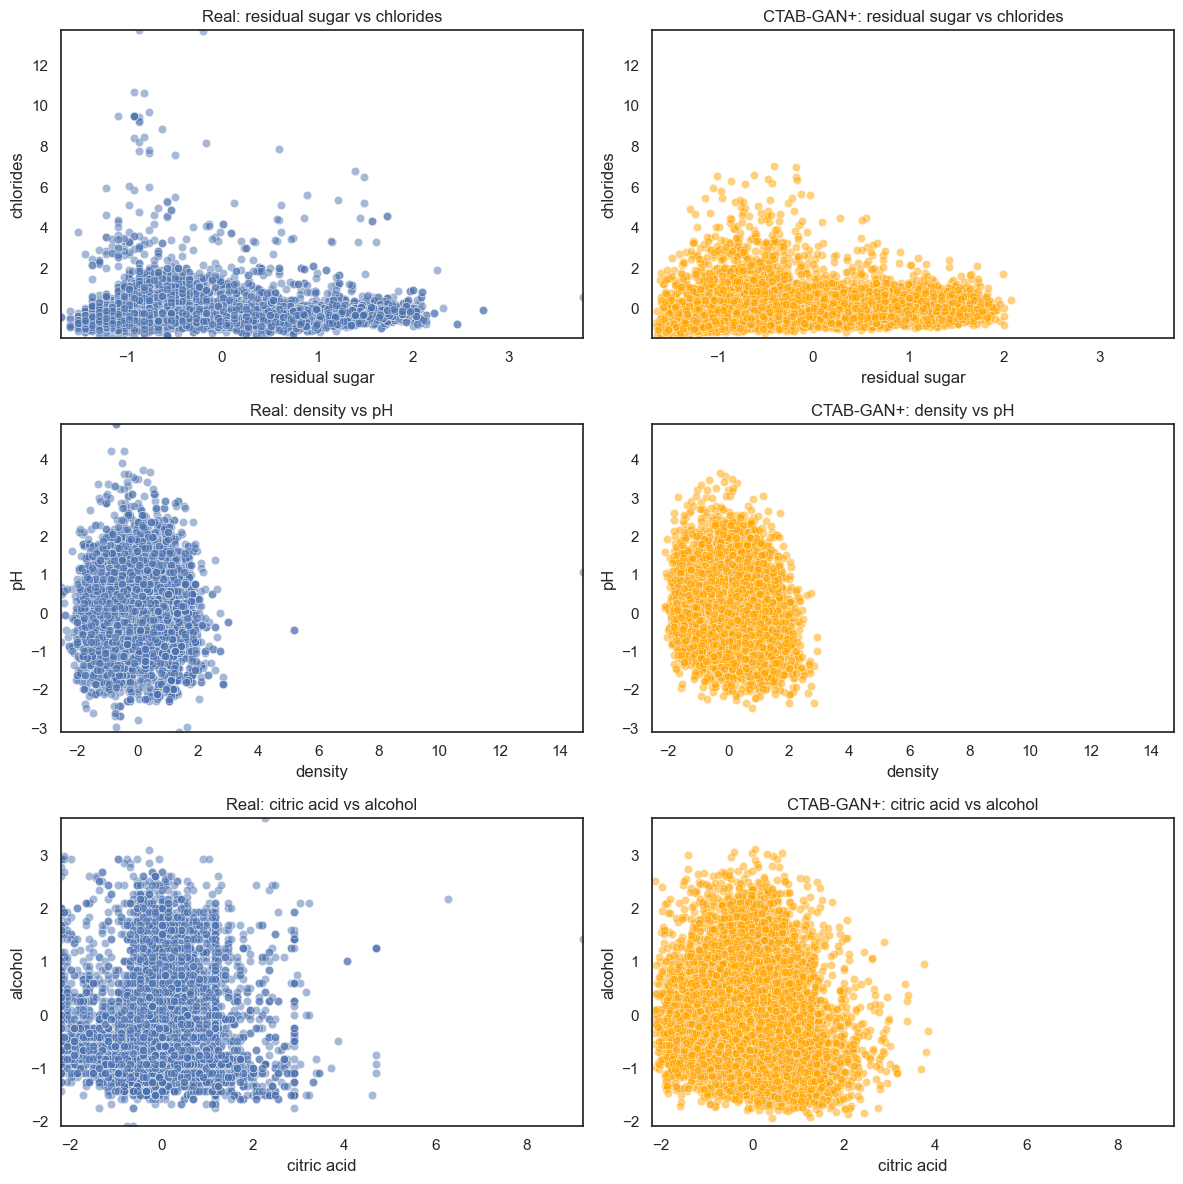

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the variable pairs to plot
pairs = [
    ('residual sugar', 'chlorides'),
    ('density', 'pH'),
    ('citric acid', 'alcohol')
]

# Plot
plt.figure(figsize=(12, 12))
for i, (x, y) in enumerate(pairs):
    # Get axis limits across real and fake for each pair
    x_min = min(real_df[x].min(), CTABGANPlus_df[x].min())
    x_max = max(real_df[x].max(), CTABGANPlus_df[x].max())
    y_min = min(real_df[y].min(), CTABGANPlus_df[y].min())
    y_max = max(real_df[y].max(), CTABGANPlus_df[y].max())

    # Real data
    plt.subplot(3, 2, 2*i + 1)
    sns.scatterplot(data=real_df, x=x, y=y, alpha=0.5)
    plt.title(f"Real: {x} vs {y}")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # Synthetic data
    plt.subplot(3, 2, 2*i + 2)
    sns.scatterplot(data=CTABGANPlus_df, x=x, y=y, alpha=0.5, color='orange')
    plt.title(f"CTAB-GAN+: {x} vs {y}")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()


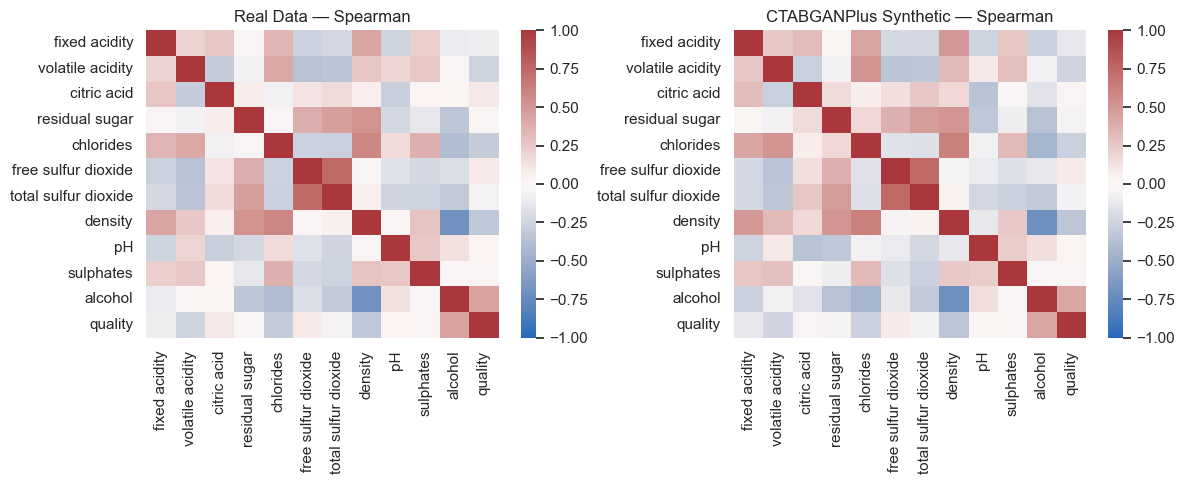

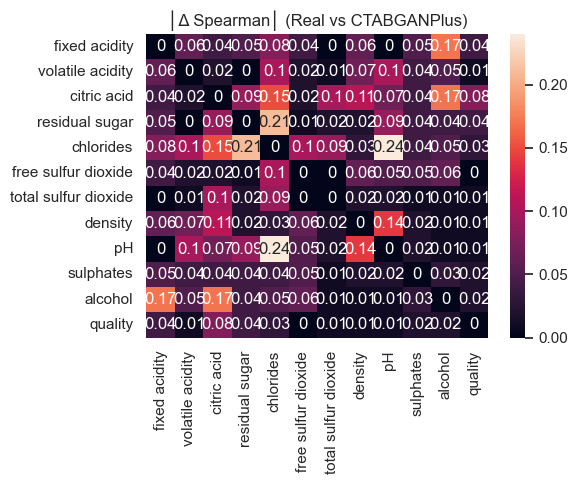

In [44]:
real_spear = real_num.corr(method="spearman")
CTABGANPlus_spear  = CTABGANPlus_num.corr(method="spearman")

# 4) Plot side by side
fig, axes = plt.subplots(1,2,figsize=(12,5), tight_layout=True)
sns.heatmap(real_spear, vmin=-1, vmax=1, center=0, cmap="vlag", ax=axes[0])
axes[0].set_title("Real Data — Spearman")
sns.heatmap(CTABGANPlus_spear,  vmin=-1, vmax=1, center=0, cmap="vlag", ax=axes[1])
axes[1].set_title("CTABGANPlus Synthetic — Spearman")
plt.show()

# 5) Compute & plot absolute‐difference
diff_spear = (CTABGANPlus_spear - real_spear).abs().round(2)
plt.figure(figsize=(6,5))
sns.heatmap(diff_spear, vmin=0, vmax=diff_spear.values.max(), cmap="rocket", annot=True)
plt.title("│Δ Spearman│ (Real vs CTABGANPlus)")
plt.tight_layout()
plt.show()


In [45]:
i,j = np.triu_indices_from(diff_spear, k=1)
print("Mean │Δ Spearman│:", diff_spear.values[i,j].mean().round(3))

Mean │Δ Spearman│: 0.053


In [46]:
i, j = np.triu_indices_from(diff_spear, k=1)
pairs = [(diff_spear.values[i_, j_], diff_spear.columns[i_], diff_spear.columns[j_])
         for i_, j_ in zip(i, j)]

# Sort and take top 3
top3 = sorted(pairs, reverse=True)[:3]

# Print nicely
print("Top 3 biggest Spearman shifts:")
for delta, f1, f2 in top3:
    print(f"  {f1!r} vs {f2!r}: Δ = {delta:.2f}")


Top 3 biggest Spearman shifts:
  'chlorides' vs 'pH': Δ = 0.24
  'residual sugar' vs 'chlorides': Δ = 0.21
  'fixed acidity' vs 'alcohol': Δ = 0.17
